# Compute off-line the bottom drag effectively used in the CREG12.L75-REF08 experiment.

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import CREG_maps_func as cregmap
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def box_plot(Tgt_box,mplot):
    # Now clearly identify the area corresponding to the FraWSC box selected above
    for i in set(np.arange(Tgt_box.shape[1],step=2)) :
        for j in set(np.arange(Tgt_box.shape[0],step=2)) :
            if not np.isnan(Tgt_box.values[j,i]) :
                X,Y = mplot(Tgt_box.glamt.values[j,i],Tgt_box.gphit.values[j,i])
                mplot.scatter(X,Y, s=5., marker='o', color='k', alpha=0.7)


In [3]:
CONFIG='CREG12.L75'   ; CASE='REF08'
CONFCASE=CONFIG+'-'+CASE

# Read CREG12.L75 grid information 

In [4]:
main_dir='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/'
grid_dir=main_dir+CONFIG+'/GRID/'

# Mask of the grid
ds_mask=xr.open_dataset(grid_dir+CONFCASE+'_mask.nc')
ds_mask

# Horizontal mesh
ds_mesh_hgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_hgr.nc')
ds_mesh_hgr

# Vertical mesh
ds_mesh_zgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_zgr.nc')
ds_mesh_zgr

# Bathymetry
ds_bathy=xr.open_dataset(grid_dir+'bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc')
ds_bathy


<xarray.Dataset>
Dimensions:     (x: 1580, y: 1801)
Dimensions without coordinates: x, y
Data variables:
    Bathymetry  (y, x) float32 ...
    nav_lon     (y, x) float32 ...
    nav_lat     (y, x) float32 ...
Attributes:
    History:  Based on bathymetry_CREG12_V3.3_CT20180612Larger_CT20160208_vh2...

In [5]:
ds_grid=xr.Dataset()
ds_grid
#ds_grid['tmask2D']=(('time','z','y','x'),ds_mask['tmask'])
#ds_grid['Tarea']=ds_mask['tmask'][0,0,:,:]*ds_mesh_hgr['e1t'][0,:,:]*ds_mesh_hgr['e2t'][0,:,:]
#ds_grid['Farea']=ds_mask['fmask'][0,0,:,:]*ds_mesh_hgr['e1f'][0,:,:]*ds_mesh_hgr['e2f'][0,:,:]
#ds_grid['tmask2D']=ds_mask['tmask'].sel(z=0).squeeze()
#ds_grid.coords['gphif']=(('y','x'),np.array(ds_mesh_hgr['gphif'][0,:,:]))
#ds_grid.coords['glamf']=(('y','x'),np.array(ds_mesh_hgr['glamf'][0,:,:]))
#ds_grid.coords['gphit']=(('y','x'),np.array(ds_mesh_hgr['gphit'][0,:,:]))
#ds_grid.coords['glamt']=(('y','x'),np.array(ds_mesh_hgr['glamt'][0,:,:]))
#ds_grid['Bathymetry']=(('y','x'),np.array(ds_bathy['Bathymetry']))
#ds_grid['lon']=(('y','x'),np.array(ds_bathy['nav_lon']))
#ds_grid['lat']=(('y','x'),np.array(ds_bathy['nav_lat']))
ds_grid['e3t_0']=(('z','y','x'),np.squeeze(np.array(ds_mesh_zgr['e3t_0'][0,:,:,:])))
ds_grid['mbathy']=(('y','x'),np.squeeze(np.array(ds_mesh_zgr['mbathy'][0,:,:])))


ds_grid

#plt.imshow(ds_grid['Farea'],origin='bottom')

<xarray.Dataset>
Dimensions:  (x: 1580, y: 1801, z: 75)
Dimensions without coordinates: x, y, z
Data variables:
    e3t_0    (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mbathy   (y, x) int16 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

In [6]:
# Bottom Drag function based on Loglayer formulation from NEMO
def Cdbot(azzz):
    rn_Cd0=2.e-3    #! drag coefficient [-] 
    rn_Cdmax =1.e-1 #! drag value maximum [-] (logarithmic drag) 
    rn_z0=3.e-3     #! roughness  
    vkarmn=0.4 
    zcd = (  vkarmn / np.log( azzz / rn_z0 )  )**2
    zcd=np.where( zcd < rn_Cd0 ,rn_Cd0 ,zcd)
    pCd0 = np.where( zcd > rn_Cdmax ,rn_Cdmax ,zcd)
    return pCd0

# Select a sub-domain first

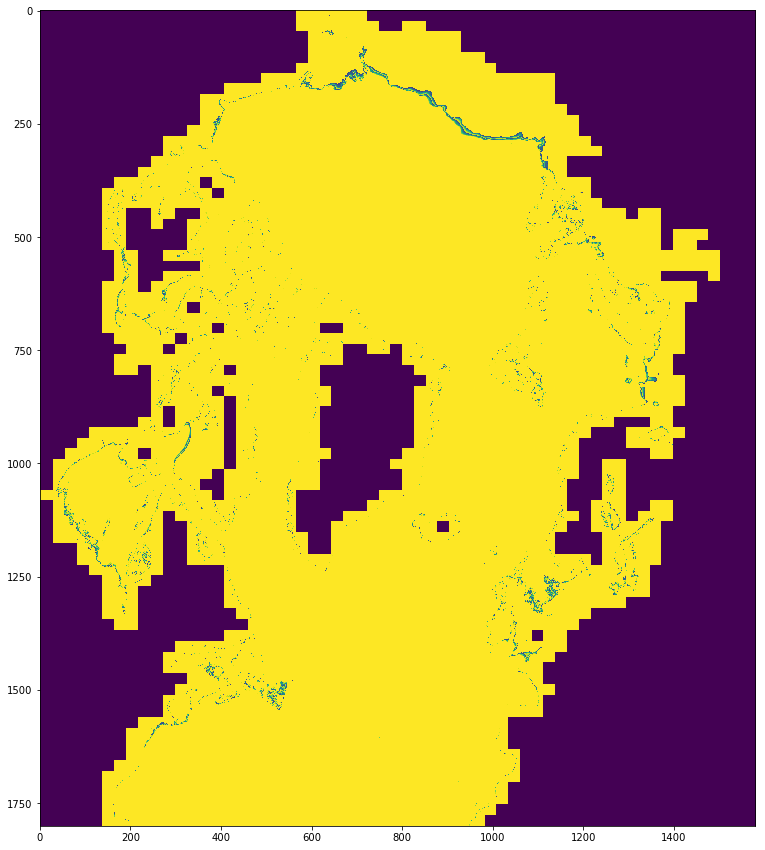

In [7]:
ds_sbd=xr.Dataset()
#ds_sbd['e3t_0']=(('z','y','x'),ds_grid['e3t_0'][:,1500::,300:1000])
#ds_sbd['tmask']=(('z','y','x'),ds_mask['tmask'][0,:,1500::,300:1000])
#ds_sbd['nav_lon']=(('y','x'),ds_bathy['nav_lon'][1500::,300:1000])
#ds_sbd['nav_lat']=(('y','x'),ds_bathy['nav_lat'][1500::,300:1000])

ds_sbd['e3t_0']=(('z','y','x'),ds_grid['e3t_0'][:,:,:])
ds_sbd['tmask']=(('z','y','x'),ds_mask['tmask'][0,:,:,:])
ds_sbd['nav_lon']=(('y','x'),ds_bathy['nav_lon'][:,:])
ds_sbd['nav_lat']=(('y','x'),ds_bathy['nav_lat'][:,:])

if True:
    plt.figure(figsize=(20,15))
    plt.imshow(np.flipud(ds_sbd['e3t_0'][20,:,:]))

In [8]:
ds_sbd

<xarray.Dataset>
Dimensions:  (x: 1580, y: 1801, z: 75)
Dimensions without coordinates: x, y, z
Data variables:
    e3t_0    (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmask    (z, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    nav_lon  (y, x) float32 -93.66704 -93.58371 ... 102.04508 101.97702
    nav_lat  (y, x) float32 25.583187 25.583206 25.583225 ... 55.075264 55.05175

# Test along a vector first

/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  

/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


e3t_1d <xarray.DataArray 'e3t_1d' ()>
array(204.228397)


(0, 310)

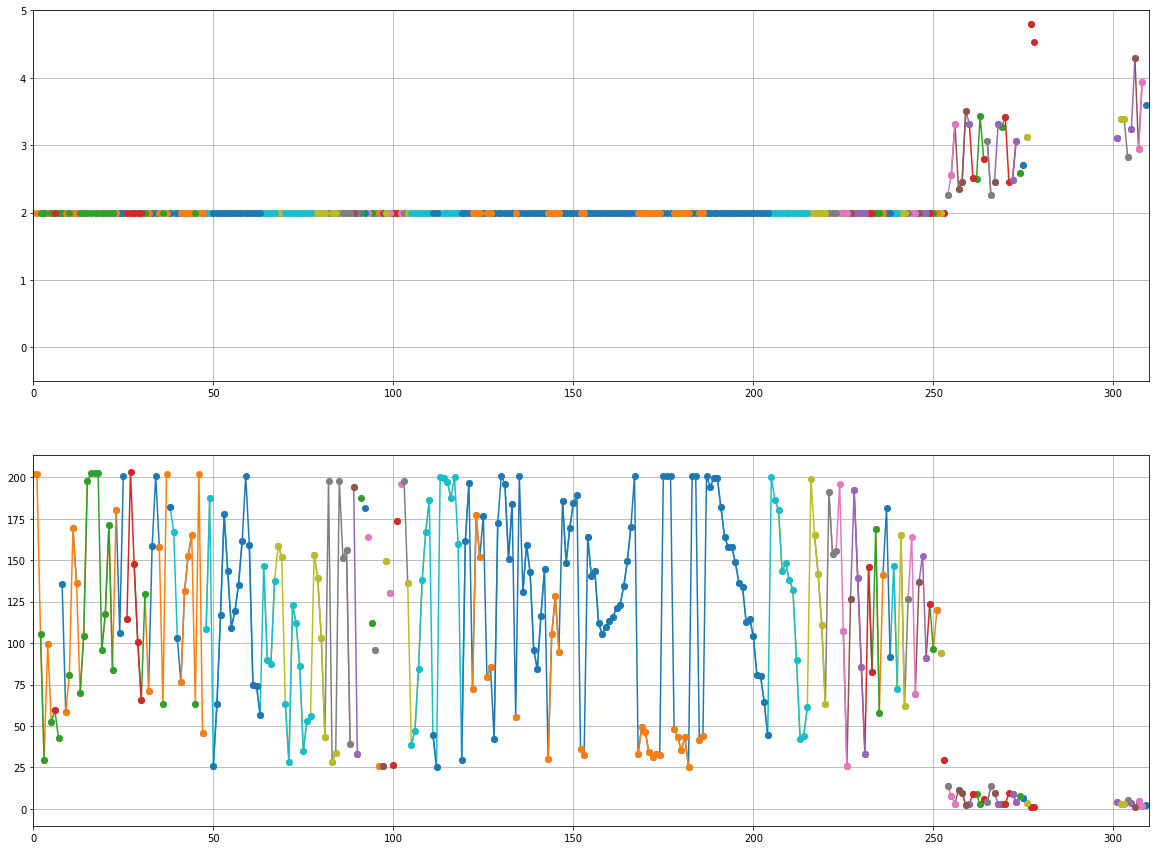

In [9]:
qsd=np.zeros((ds_sbd.dims['z'],ds_sbd.dims['y'],ds_sbd.dims['x']))

for k in set(np.arange(75)): 
    for i in set(np.arange(1)+350): 
        qsd[k,:,i]=Cdbot(ds_sbd['e3t_0'][k,:,i])
        # The trick here is to remove all full ocean point that have the same scale factor at a given level
        qsd[k,:,i]=xr.where( ds_sbd['e3t_0'][k,:,i] == ds_mesh_zgr['e3t_1d'][0,k], np.nan,qsd[k,:,i])
 
print('e3t_1d',ds_mesh_zgr['e3t_1d'][0,k])

plt.figure(figsize=(20,15))

plt.subplot(211)
for k in set(np.arange(75)): 
    for i in set(np.arange(1)+350):
        plt.plot(qsd[k,:,i]*1e3,marker='o')
plt.ylim([-0.5,5.])        
plt.grid()
plt.xlim([0,310])
        
plt.subplot(212)
for k in set(np.arange(75)): 
    for i in set(np.arange(1)+350):
        #plt.plot(ds_sbd['e3t_0'][k,:,i])
        plt.plot(xr.where( ds_sbd['e3t_0'][k,:,i] == ds_mesh_zgr['e3t_1d'][0,k], \
                          np.nan,ds_sbd['e3t_0'][k,:,i]),marker='o')
plt.grid()
plt.xlim([0,310])



In [10]:
ds_sbd['slice']=(('z','y','x'),qsd)
ds_sbd['C0']=(('y','x'),np.sum(np.unique(xr.where(np.isnan(ds_sbd['slice']),0.,ds_sbd['slice']),axis=0),axis=0))

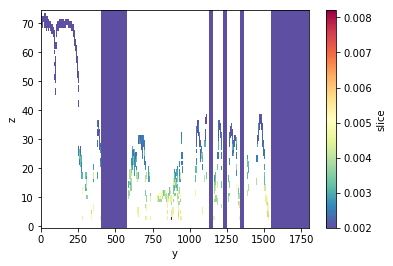

In [11]:
ds_sbd['slice'].isel(x=350).plot(cmap='Spectral_r')

In [12]:
print((ds_sbd['slice'].isel(x=350,y=200)))

<xarray.DataArray 'slice' (z: 75)>
array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan, 0.002,
       0.002,   nan,   nan,   nan,   nan])
Dimensions without coordinates: z


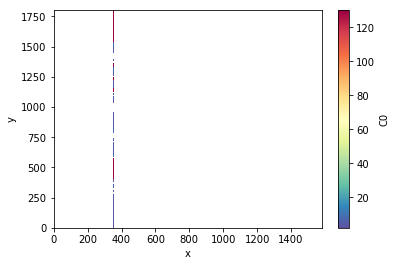

In [13]:
(xr.where(ds_sbd['C0']==0., np.nan,ds_sbd['C0'])*1e3).plot(cmap='Spectral_r')

# Apply it to a 2D shape

In [14]:
aze=np.zeros((ds_sbd.dims['z'],ds_sbd.dims['y'],ds_sbd.dims['x']))
for k in set(np.arange(75)): 
        Cd02D=Cdbot(ds_sbd['e3t_0'][k,:,:])
        # The trick here is to remove all full ocean point that have the same scale factor at a given level
        aze[k,:,:]=xr.where(ds_sbd['e3t_0'][k,:,:] == ds_mesh_zgr['e3t_1d'][0,k],0. ,Cd02D)
        

/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  

/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  

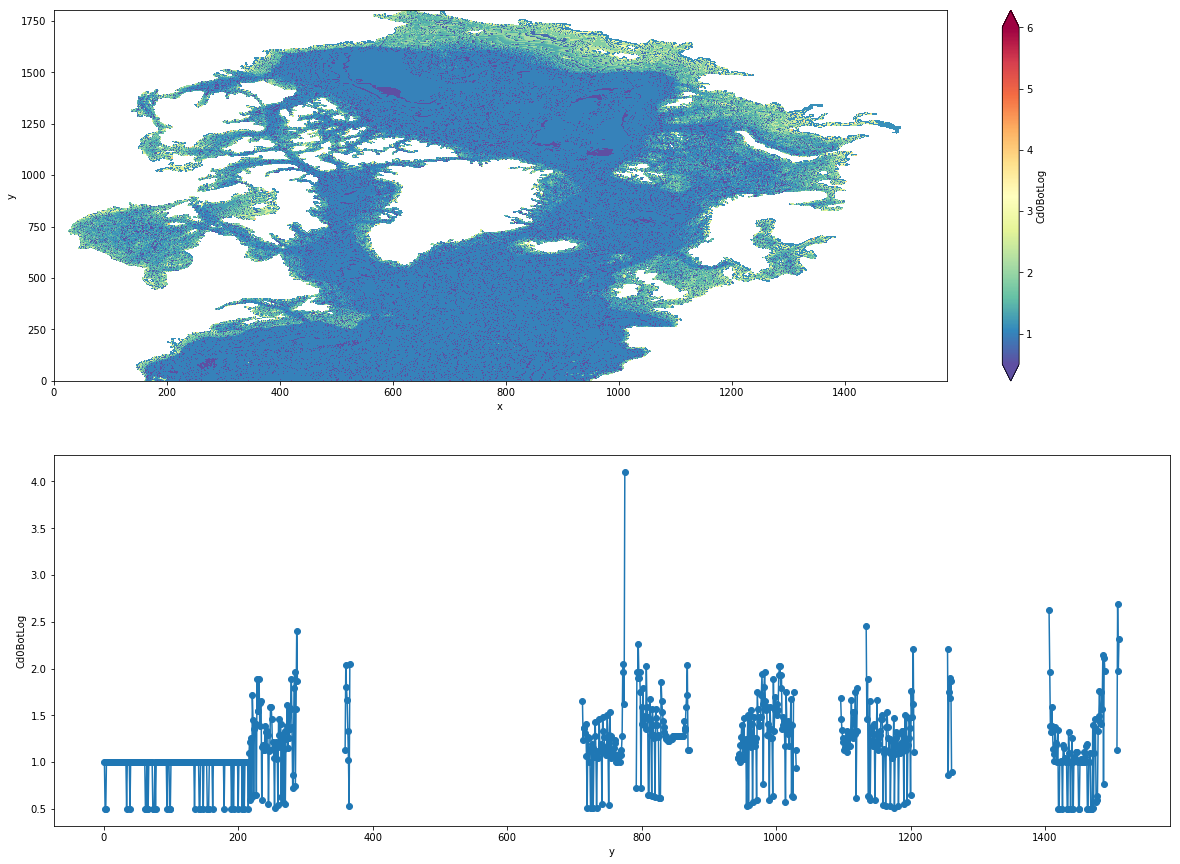

In [18]:
dsout=xr.Dataset() 

# Select only a unique values over the vertical 
temp=np.unique(aze,axis=0)
# Then sum to get final 2D field (since all others grid points have been set to zero)
Cd0=np.sum(temp,axis=0)
# Mask over land 
Cd0=xr.where(ds_sbd['tmask'][0,:,:] == 0., np.nan, Cd0)

# Now save right fields
# CAUTION: need to divide the final field by a factor 2 since over few vertical column, 2 non-zero values 
# remains without a clear reason for that, not solved yet.
alpha=0.5
dsout['Cd0BotLog']=(('y','x'),Cd0*alpha)
dsout['Cd0Bot3D']=(('z','y','x'),aze)
dsout['e3tloc']=(('z','y','x'),ds_sbd['e3t_0'][:,:,:])

plt.figure(figsize=(20,15))
plt.subplot(211)
(dsout['Cd0BotLog']*1e3/2.).plot(cmap='Spectral_r',extend='both',vmax=6.)

plt.subplot(212)
(dsout['Cd0BotLog']*1e3/2.).isel(x=300).plot(marker='o')

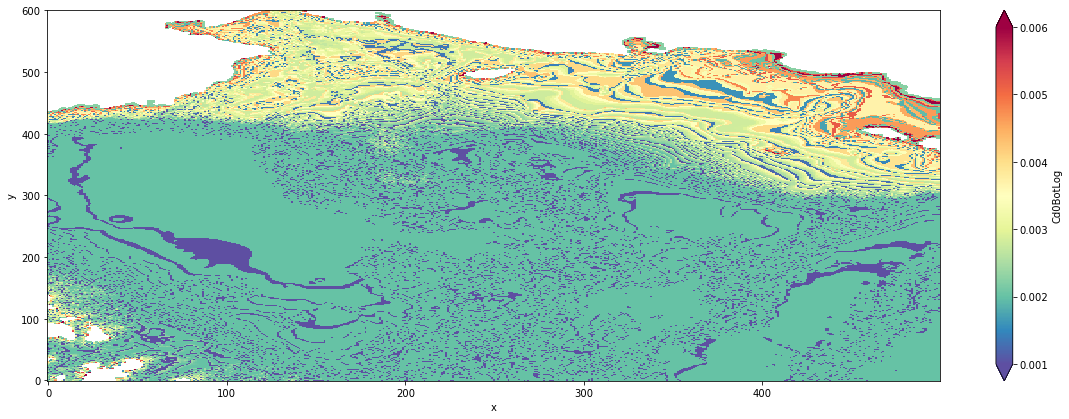

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(211)
(dsout['Cd0BotLog'][1200::,500:1000]).plot(cmap='Spectral_r',extend='both',vmax=6.e-3)
plt.savefig('.png',dpi=300)

In [16]:
dsout=xr.Dataset()
dsout['Cbot']=(('y','x'),Cd0*alpha)
dsout.coords['nav_lon']=(('y','x'),ds_sbd['nav_lon'])
dsout.coords['nav_lat']=(('y','x'),ds_sbd['nav_lat'])
dsout.Cbot.attrs['var']='Bottom drag relying on a loglayer formulation'
dsout.Cbot.attrs['units']='-'

dsout.to_netcdf('./CREG12.L75-REF08_BotDrag.nc')